# Simple Linear Regression

### Build a model which predicts sales based on the money spent on different platforms for marketing.
#### we'll build a linear regression model to predict Sales using an appropriate predictor variable.

In [1]:
import warnings 
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
advs=pd.DataFrame(pd.read_csv("advertising.csv"))
advs

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


### problem statment : we will build predictive model by simple linear regression when use the continious variable target  "Sales" and highest correlated one of features 

## data exploration

In [3]:
advs.info()

<bound method DataFrame.info of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

In [4]:
advs.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
# Linear regression models are more sensitive to numeric features that are highly skewed or have significant outliers
advs.skew() 
# output: left and right skewd data like tv has negative , that is meanniing the distribution has a long tail on the left side. This suggests most data points are concentrated on the right, with some smaller outliers on the left
# decision : the data is close to being normally distributed becuase the skewness values for features are relatively low

TV          -0.069853
Radio        0.094175
Newspaper    0.894720
Sales       -0.073739
dtype: float64

## Data Cleaning

In [6]:
#checking the nulls
advs.isnull().sum() * 100/advs.shape[0]

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

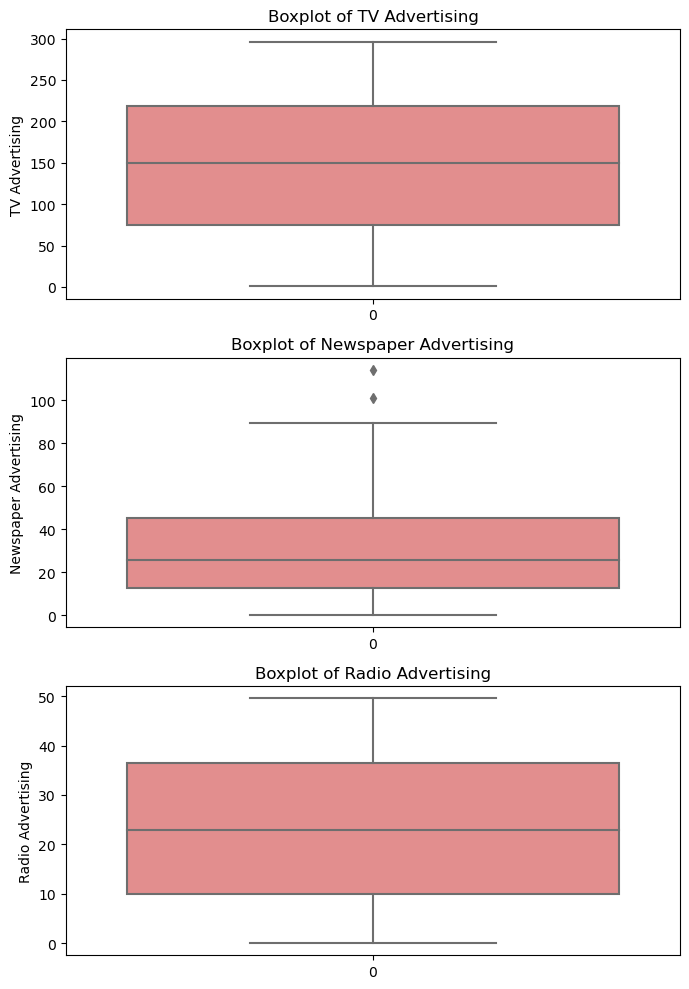

In [7]:
# ckeck the outliers
fig, axs = plt.subplots(3, figsize=(7, 10))


sns.boxplot(advs['TV'], ax=axs[0], color='lightcoral')
sns.boxplot(advs['Newspaper'], ax=axs[1], color='lightcoral')  
sns.boxplot(advs['Radio'], ax=axs[2], color='lightcoral')  

axs[0].set_title('Boxplot of TV Advertising')
axs[0].set_ylabel('TV Advertising')

axs[1].set_title('Boxplot of Newspaper Advertising')
axs[1].set_ylabel('Newspaper Advertising')

axs[2].set_title('Boxplot of Radio Advertising')
axs[2].set_ylabel('Radio Advertising')


# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

In [8]:
#check duplications
advs.duplicated().sum()

0

### there are no duplication , nulls and outliers not considerable , overall data is clean

## Data Visaulization

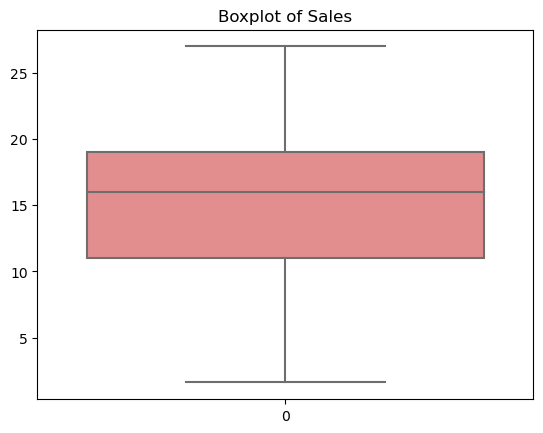

In [9]:
# Plotting the boxplot
sns.boxplot(advs["Sales"] ,  color='lightcoral')

# Adding a title with plt.title()
plt.title('Boxplot of Sales')

plt.show()

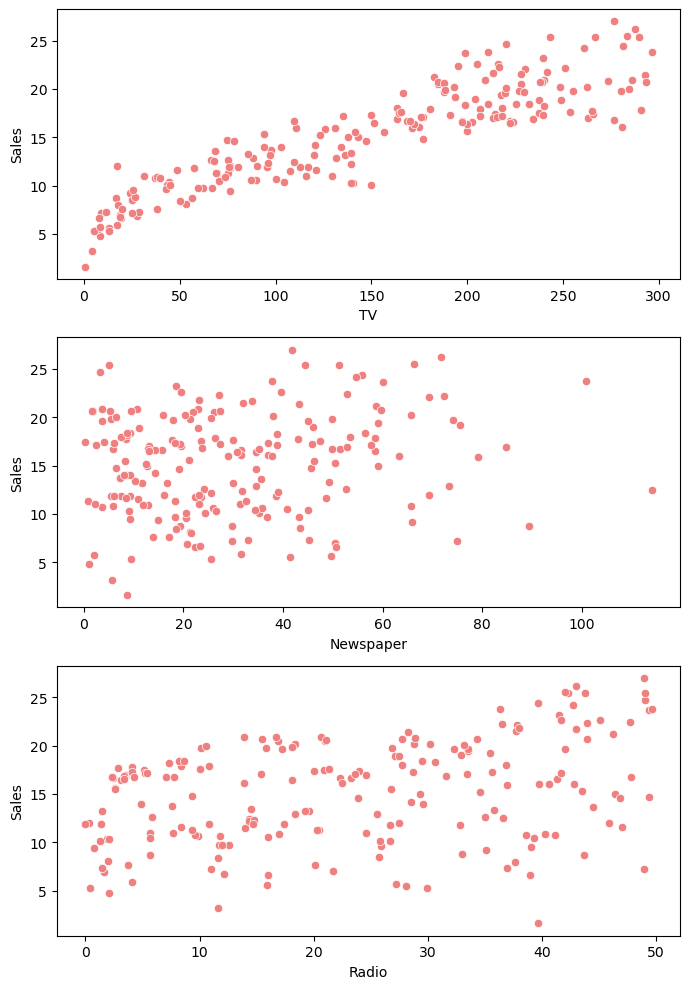

In [10]:
fig,axs =plt.subplots(3,figsize=(7,10))

sns.scatterplot(y=advs["Sales"],x=advs["TV"],ax=axs[0],color='lightcoral')
sns.scatterplot(y=advs["Sales"],x=advs["Newspaper"],ax=axs[1],color='lightcoral')
sns.scatterplot(y=advs["Sales"],x=advs["Radio"],ax=axs[2],color='lightcoral')

plt.tight_layout()
plt.show()

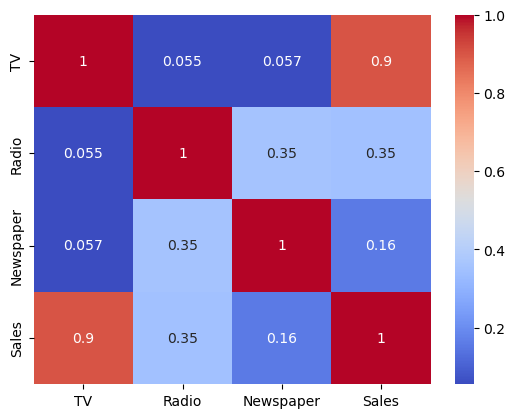

In [11]:
sns.heatmap(advs.corr(), cmap="coolwarm", annot = True) #annot for annotation on the each cell #cmap mean color map
plt.show()

### from the previous charts as is visiable the TV seems is the most correlated with Sales , so we will go ahead using TV as a variable feature for simple linear regression , eq : y=c+m1×TV

## Split data before fitting the model
### This is a crucial step to  train the model on subset of data then evaluate the performance of a model on unseen subset of data.

In [12]:
X=advs["TV"]
Y=advs["Sales"]
print("the independent feature variable is\n",X,"\n\nand the dependant target variable is\n",Y)

the independent feature variable is
 0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64 

and the dependant target variable is
 0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64


In [13]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=90)

In [14]:
print(X_train.head())
print()
print(Y_train.head())

187    191.1
60      53.5
94     107.4
43     206.9
163    163.5
Name: TV, dtype: float64

187    17.3
60      8.1
94     11.5
43     17.9
163    18.0
Name: Sales, dtype: float64


#### By default, the statsmodels library does not include an intercept in its linear regression models.If you want to include an intercept,you need to add a constant term to your dataset manually 

In [15]:
import statsmodels.api as sm

# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(Y_train, X_train_sm).fit()

### clarification
OLS (Ordinary Least Squares) is method to estimate the coefficients in a linear regression model. It seeks to minimize the sum of the squared differences (residuals) between the observed values (actual data points) and the predicted values generated by the linear model, OLS tries to find the line that best fits the data by minimizing the vertical distances between the data points and the regression line (minimizing the errors). 
so after we prepared the data we will first estimate the cofficients then fitting the model and finally interpret results

In [16]:
lr.params # will return thee parameters of for your model ,( intercept and slope )

const    6.767155
TV       0.056840
dtype: float64

In [18]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     719.6
Date:                Tue, 20 Aug 2024   Prob (F-statistic):           1.33e-56
Time:                        16:49:42   Log-Likelihood:                -310.00
No. Observations:                 140   AIC:                             624.0
Df Residuals:                     138   BIC:                             629.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7672      0.360     18.809      0.0

## interpret the results :

- R-squared (0.839): The model explains 83.9% of the variance in Sales based on TV advertising spend. This is a high value, indicating a strong fit.
- Adj. R-squared (0.838): After adjusting for the number of predictors, the model still explains 83.8% of the variance. The minimal drop from R-squared suggests that the model is not overfitting.
- F-statistic (719.6): This indicates that the model is statistically significant overall. The associated p-value (1.33e-56) is extremely small, confirming that the relationship between TV advertising and Sales is statistically significant.
- Intercept ([6.056, 7.479]): We are 95% confident that the true value of the intercept lies within this range.
- TV coefficient ([0.053, 0.061]): We are 95% confident that the true impact of TV advertising on sales lies within this range.
- Intercept (const = 6.7672): This is the baseline sales value when TV advertising spend is zero. On average, the sales would be around 6.77 units.
- Slope (TV = 0.0568): For every additional unit of TV advertising spend, the sales increase by 0.0568 units. This positive coefficient confirms that there is a positive relationship between TV advertising spend and sales.

#### so we conlude this : The model is strong and explains a significant portion of the variation in sales based on TV advertising,There is a positive significant relationship between TV advertising spend and sales
## line eq is :   Sales = 6.7672 + 0.0568×TV 

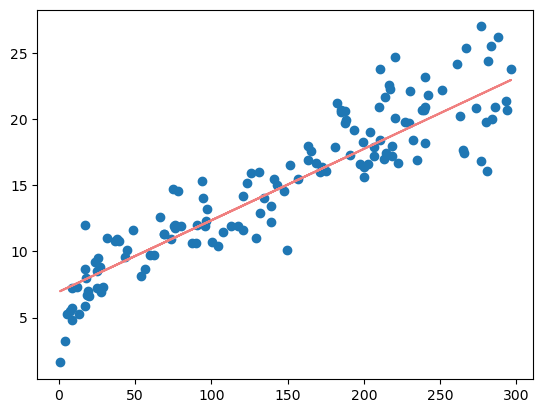

In [27]:
plt.scatter(X_train, Y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'lightcoral')
plt.show()

# The scatter plot shows the actual data points (X_train vs. y_train).
# The red line represents the fitted linear regression model, which predicts the y values from the X_train data using eq 

## Test and model evalution

In [29]:
Y_train_pred = lr.predict(X_train_sm)
res = (Y_train - Y_train_pred)
print(res)

187   -0.329341
60    -1.708113
94    -1.371806
43    -0.627418
163    1.939452
         ...   
67    -1.285012
159   -1.353026
114    3.387931
157   -5.181836
91    -1.092789
Length: 140, dtype: float64


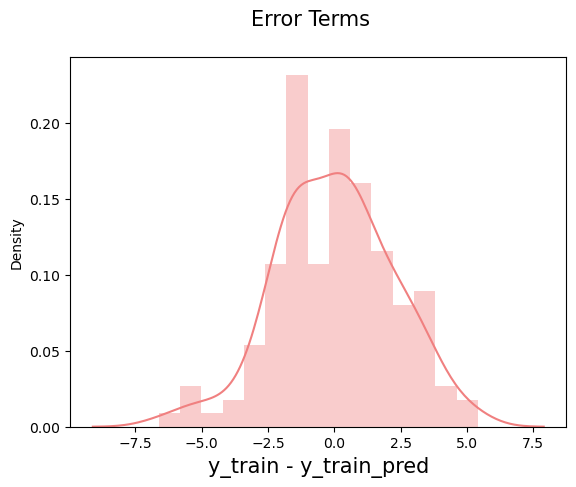

In [30]:
# how the errors in the model are distributed 
fig = plt.figure()
sns.distplot(res, bins=15, color='lightcoral')  
fig.suptitle('Error Terms', fontsize=15)        
plt.xlabel('y_train - y_train_pred', fontsize=15)  
plt.show()

# good output : the residuals are normally distributed with a mean 0

### So we realize that :
- Model Confidence and Predictive Power:
we are confident that the model's fit is not due to random chance. This is supported by strong statistical measures (e.g., a low p-value or high R-squared)
- Normality of Residuals:
The residuals are assumed to follow a normal distribution. This normality allows for valid statistical inference about the model's coefficients
- Increasing Residual Variance (Heteroscedasticity):
However, the residuals show increasing variance with larger values of the predictor variable X. This suggests heteroscedasticity, meaning that the model's errors are not consistent across all levels of X. This indicates that there are some patterns or variations in the data that the model is not fully capturing.

## testing on X_test

In [35]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
Y_pred = lr.predict(X_test_sm)

In [36]:
Y_pred.head()

193    16.248121
15     17.873755
82     11.047232
161    11.638371
184    21.193229
dtype: float64

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#### RMSE provides way to quantify the accuracy of your model. A lower RMSE indicates better fit and prediction accuracy and also it depends on the range of data and the model performance
for ex : RMSE = 2.447 (in thousands of dollars) means that on average, your model's predictions are off by approximately $2,447 from the actual house prices.

In [40]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(Y_test, Y_pred))

2.4472925569657167

#### The R squared score (also known as the coefficient of determination) measures how well your model’s predictions match the actual data

In [43]:
r_squared = r2_score(Y_test, Y_pred)
r_squared

0.7186373885738093

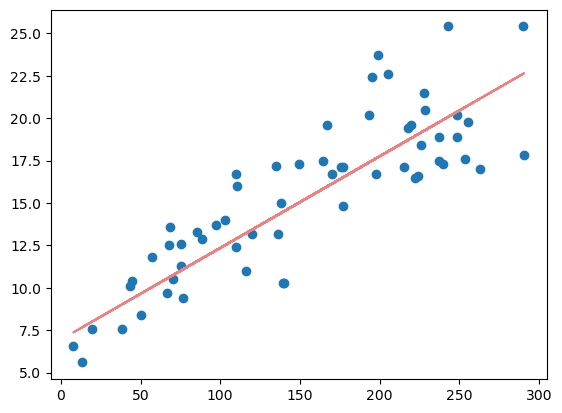

In [48]:
# visualize
plt.scatter(X_test, Y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test,'lightcoral')
plt.show()

# Thanks 